Step 1: Imports

In [17]:
import pandas as pd
from training.data_preprocessing import DataPreprocessor
from training.linear_regression_model import LinearRegressionModel
from training.trend_analysis import TrendAnalyzer
from visualization.charts import DSSCharts
from sklearn.model_selection import train_test_split
from training.trend_analysis import CallCenterAnalyzer

Step 2: Load | Prepare | Display 

Model Evaluation Summary
------------------------
Mean Service Level: 89.52
Median Service Level: 98.14
Max Service Level: 100.00
Min Service Level: 0.00


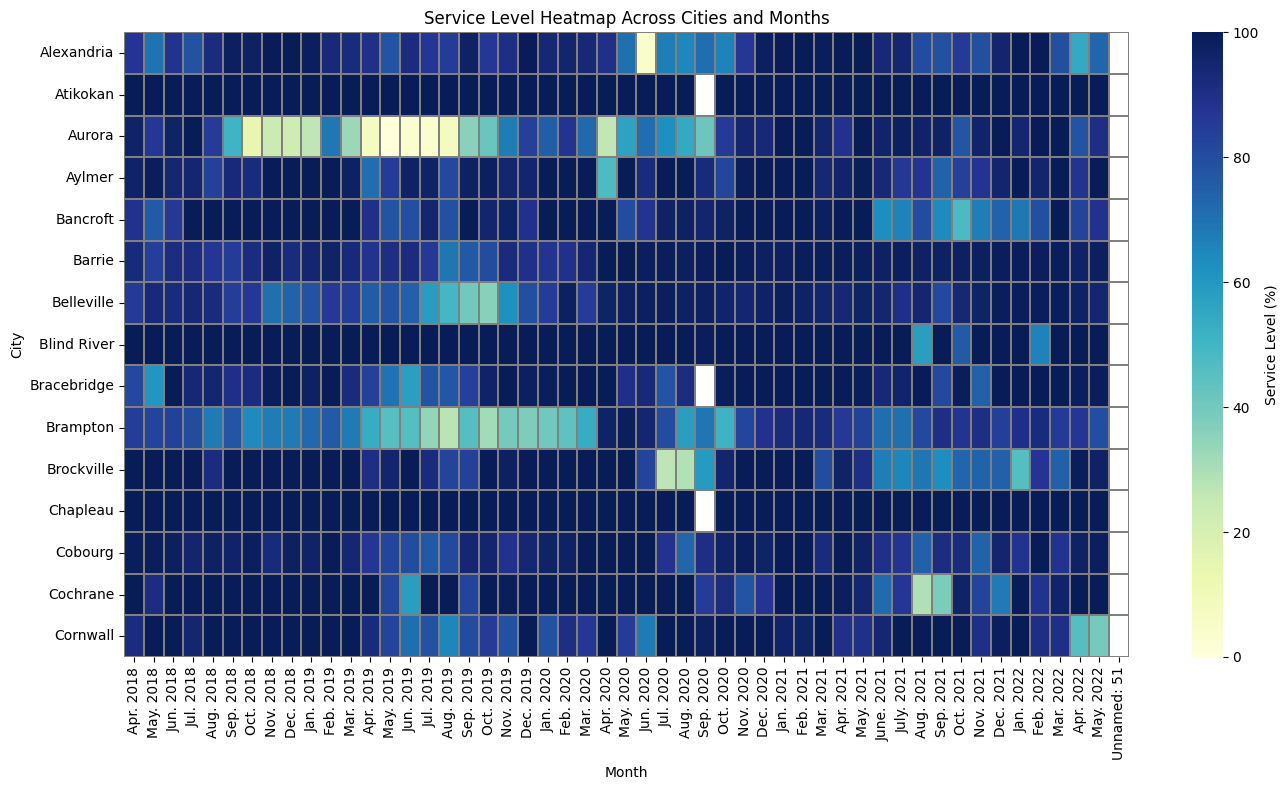

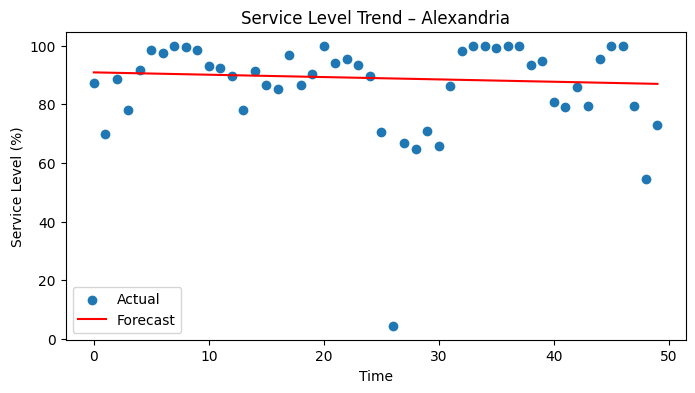

In [18]:
df = pd.read_csv("data-collection/service_level_data.csv")
df = DataPreprocessor.clean_percentage_data(df)

# Rename first column to City
df.rename(columns={df.columns[0]: 'City'}, inplace=True)

# Clean percentage values
df = DataPreprocessor.clean_percentage_data(df)

# OPTIONAL: focus on a subset of cities for readability
sample_df = df.head(15)

# Generate heatmap
DSSCharts.service_level_heatmap(
    sample_df,
    title="Service Level Heatmap Across Cities and Months",
    context="The heatmap highlights periods of consistently low service levels across multiple locations, "
    "enabling DSS-driven interventions such as staffing reallocation or schedule optimization"
)

alex = TrendAnalyzer.prepare_city_timeseries(df, "Alexandria")

X = alex[['Month_Index']]
y = alex['Service_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegressionModel()
model.train(X_train, y_train)

predictions = model.predict(X)
DSSCharts.trend_line(X, y, predictions, "Service Level Trend – Alexandria")

### Heatmap Interpretation (Decision Support Insight)

The heatmap visualizes service levels across multiple cities and months.
Darker regions indicate consistently high performance, while lighter regions
highlight periods of service degradation.

Key observations:
- Certain cities show seasonal dips, suggesting staffing or demand fluctuations.
- Consistently strong performers indicate stable operational processes.
- The DSS can use this visualization to prioritize intervention in low-performing
  locations and proactively allocate resources.


Call Center Data

In [19]:
df_calls = pd.read_csv("data-collection/call_center_data.csv")

df_calls.head()


#prepating the data
queue_name = "Access for Ontarians with Disabilities Act queues  (English + French)"

call_ts = CallCenterAnalyzer.prepare_call_center_timeseries(
    df_calls,
    queue_name
)

# Clean numeric columns
call_ts['Calls Handled'] = call_ts['Calls Handled'].astype(str).str.replace(',', '').astype(float)
call_ts['Average Wait Time (minutes)'] = call_ts['Average Wait Time (minutes)'].astype(float)

call_ts

,Month_Year,Calls Handled,Average Wait Time (minutes)
0,2016-01-01,678.0,0.27
1,2016-02-01,645.0,0.23
2,2016-03-01,585.0,0.20
3,2016-04-01,566.0,0.18
4,2016-05-01,640.0,0.27
...,...,...,...
76,2022-05-01,314.0,0.31
77,2022-06-01,292.0,0.72
78,2022-07-01,232.0,1.43
79,2022-08-01,235.0,1.45


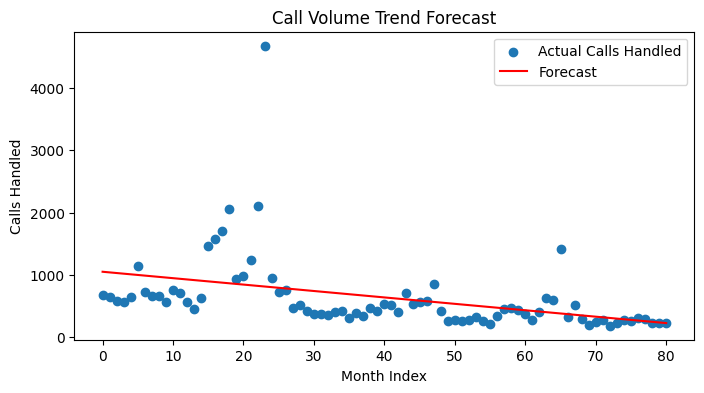

In [20]:
# Trend Analysis for Call Center - Demand Forecast
call_ts['Month_Index'] = range(len(call_ts))

X_calls = call_ts[['Month_Index']]
y_calls = call_ts['Calls Handled']

X_train_calls, X_test_calls, y_train_calls, y_test_calls = train_test_split(X_calls, y_calls, test_size=0.2, random_state=42)

model_calls = LinearRegressionModel()
model_calls.train(X_train_calls, y_train_calls)

predictions_calls = model_calls.predict(X_calls)

# Plot the trend
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(X_calls, y_calls, label="Actual Calls Handled")
plt.plot(X_calls, predictions_calls, color='red', label="Forecast")
plt.xlabel("Month Index")
plt.ylabel("Calls Handled")
plt.title("Call Volume Trend Forecast")
plt.legend()
plt.show()

### Call Center Demand Forecast Interpretation (DSS Insight)

The scatter plot shows actual monthly call volumes with a linear regression forecast line.
This provides a demand forecast for planning purposes.

Key DSS insights:
- The forecast can predict future call volumes to optimize staffing levels.
- Deviations from the trend may indicate external factors requiring investigation.
- Proactive resource allocation based on forecasted demand can improve service efficiency.

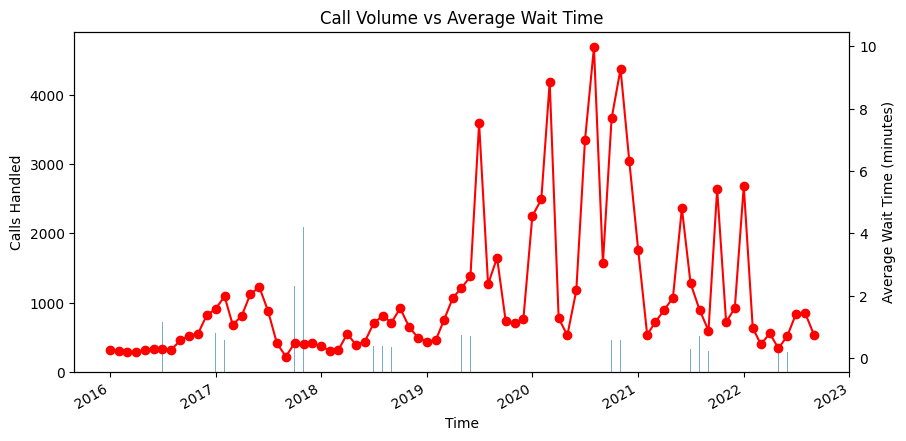

In [21]:
#Visualize Runtime Output
DSSCharts.call_center_trends(call_ts)

### Call Center Trend Interpretation (DSS Insight)

The visualization compares monthly call volume with average wait time.
Periods with higher call volumes tend to show increased wait times,
indicating capacity constraints.

Key DSS insights:
- Rising wait times during high call volume periods suggest the need for
  additional staffing or call routing optimization.
- Stable wait times despite increased call volume indicate efficient
  queue management.
- The DSS can use these trends to forecast demand and proactively adjust
  resource allocation.
